C:\Users\20192167\Anaconda3\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


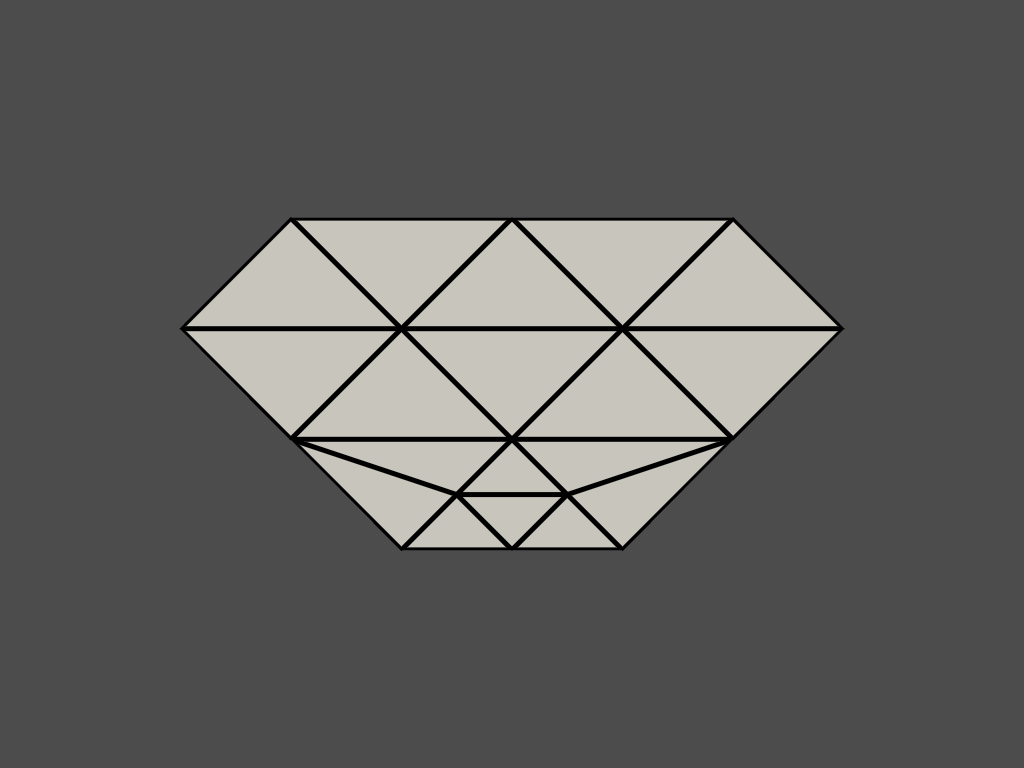

In [1]:
import numpy as np
import pyvista
import math

points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [4,0,0],
                  [3,1,0],
                  [1,-1,0],
                  [3,-1,0],
                  [6,0,0],
                  [5,1,0],
                  [5,-1,0],
                  [2,-2,0],
                  [4,-2,0]])
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]

c = 11 #number of the cell you wish to refine
d = cells[c][1]
e = cells[c][2]
f = cells[c][3]
cy=[d,e,f] #the numbers of the points creating the cell
g = len(points) #the total number of points in the mesh
i = len(cells) #the total number of cells in the mesh

#------Calculating the connectivity of the points---------------------------------------------------------------------#
connected_points = [] #the number of cells a single point is connected to
cp1 = 0

for y in range(0,g):
        if y == 3:
            for x in range(0,i):
                cp = cells[x].count(y) #counting the number of times a point has been listed in the cells array
                cp1= cp1+cp #adding up the counting               
            connected_points.append(cp1-i) #removing the additional countings of the triangluarity of the cells
            cp1 = 0
            
        elif y != 3:
            for x in range(0,i):
                cp = cells[x].count(y) #counting the number of times a point has been listed in the cells array
                cp1= cp1+cp #adding up the counting 
            connected_points.append(cp1)
            cp1 = 0

#------Calculating the connectivity of the cells----------------------------------------------------------------------#
connected_cells = [] #the number of cells a single cell is connected to

for y in range(0, i):
    a1 = connected_points[cells[y][1]]
    a2 = connected_points[cells[y][2]]
    a3 = connected_points[cells[y][3]]
    b = [a1,a2,a3] #an array containing the connectivity of the points of a specific cell
    c1 = b.count(2)
    c2 = b.count(3)
    c3 = b.count(6)
    if c1+c2 == 2: #if the cell is connected to two other cells
        cc = 2
        connected_cells.append(cc)
    elif c3 >= 2: #if the cell is connected to three other cells
        cc = 3
        connected_cells.append(cc)
    elif c1+c2+c3 == 1: #if the cell is connected to one other cells
        cc = 1
        connected_cells.append(cc)
        
#-----Splitting the cell in four--------------------------------------------------------------------------------------#  
point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side
points = np.vstack([points,point1,point2,point3]) #adding the points to the points array

g = len(points) #the new total number of points

#changing the original cell to to the refined cell
cells[c]= [3, (g-1),(g-2),f] 
cells = np.vstack([cells, [3, d,(g-1),(g-3)]])
cells = np.vstack([cells, [3, (g-2),e,(g-3)]])
cells = np.vstack([cells, [3, (g-1),(g-2),(g-3)]])

#--------Finding the neighbouring cells-------------------------------------------------------------------------------#
y = [] #numbers of the neighbouring cells
v = 0

for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
    if d in cells[x][1:] and e in cells[x][1:]:
        y.append(x)
        v=1
if v!= 1:
    y.append(i+1) 

v=0
for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
    if e in cells[x][1:] and f in cells[x][1:]:
        y.append(x)
        v=1
if v!= 1:
    v=0 
    y.append(i+1)     

v=0
for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
    if d in cells[x][1:] and f in cells[x][1:]:
        y.append(x)
        v=1     
if v!= 1:
    v=0
    y.append(i+1)

#--------Determining which point the cells do not share---------------------------------------------------------------#
r =[]

for x in range (0,3):
    q = cells[y[x]][1:] #points in the neighbouring cell
    for x in range (0,3):
        q1 = q[x]
        if q1 in cy: #if two cells share a point
            t = 1
            r.append(t)
        else: # if two cells do not share a point
            t = 0
            r.append(t)

#---------Splitting the neighbouring cells---------------------------------------------------------------------------#
j = 0
h = 0
p = [] #a storange array for the following for loop
n = []
m = [] #an array containing the index numbers of the overlapping points

for x in range(0,len(r)+1):
    if j < 3: 
        a = r[x]
        p.append(a)
        j = j+1
    elif j == 3:  
        for z in range(0,3):
            z1=p[z]
            if z1==1:
                n.append(z)
                h=h+1
                if h == 2:
                    m.append(n[0])
                    m.append(n[1])
                    n = []
        h = 0 
        p = [] 
        n = []
        
        if x < 9:
            a = r[x]
            p.append(a)
        j=1
        h=0

n=3
j=0 

#Splitting the neigbouring cells in two
for z in range(0,3):
    u = y[z]
    if u <= i:
        d1 = cells[y[z]][1]
        e1 = cells[y[z]][2]
        f1 = cells[y[z]][3]
        cell = [3, d1, e1, f1]
        cell[m[j]+1] = g-n   
        cells[y[z]]= cell
        j=j+1
        cell = [3, d1, e1, f1]
        cell[m[j]+1] = g-n
        cells = np.vstack([cells, cell])  
        j=j+1
    n=n-1
    
#---------Plotting the new mesh--------------------------------------------------------------------------------------#
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(15)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

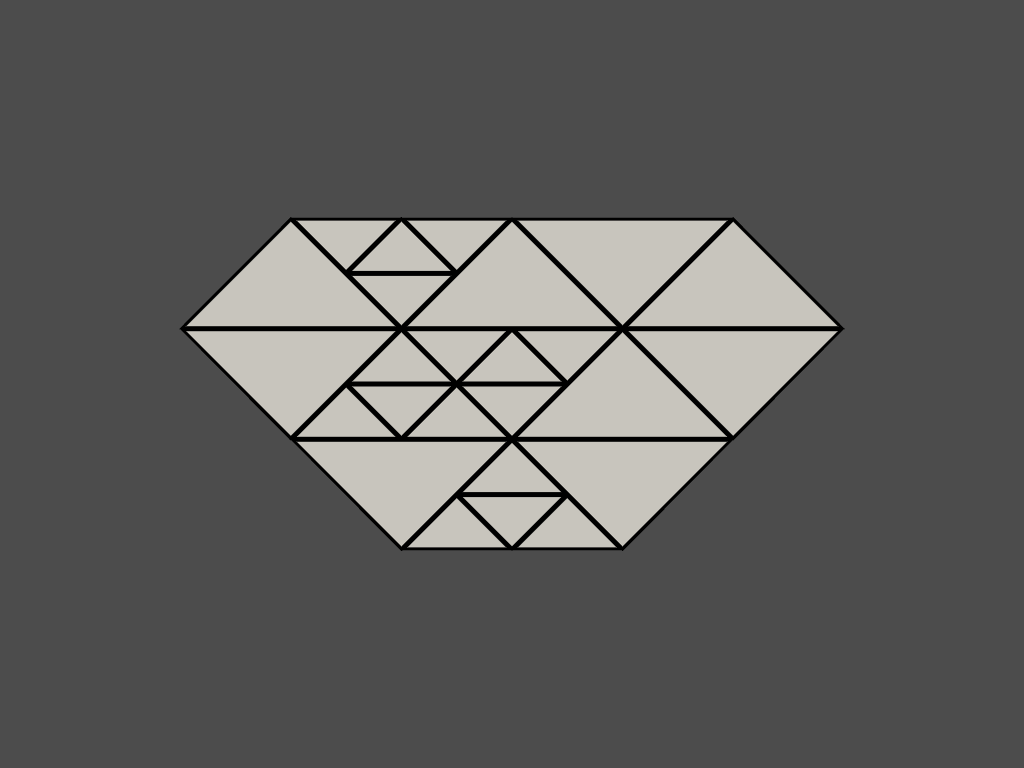

In [2]:
import numpy as np
import pyvista
import math

points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [4,0,0],
                  [3,1,0],
                  [1,-1,0],
                  [3,-1,0],
                  [6,0,0],
                  [5,1,0],
                  [5,-1,0],
                  [2,-2,0],
                  [4,-2,0]])
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]

c = [5,11,2,4] #number of the cell you wish to refine
clen = len(c)
r = []

for cx in range(0,clen):
    d = cells[c[cx]][1]
    e = cells[c[cx]][2]
    f = cells[c[cx]][3]
    cy=[d,e,f] #the numbers of the points creating the cell
    g = len(points) #the total number of points in the mesh
    i = len(cells) #the total number of cells in the mesh

    #------Calculating the connectivity of the points---------------------------------------------------------------------#
    connected_points = [] #the number of cells a single point is connected to
    cp1 = 0

    for y in range(0,g):
        if y == 3:
            for x in range(0,i):
                cp = cells[x].count(y) #counting the number of times a point has been listed in the cells array
                cp1= cp1+cp #adding up the counting               
            connected_points.append(cp1-i) #removing the additional countings of the triangluarity of the cells
            cp1 = 0
            
        elif y != 3:
            for x in range(0,i):
                cp = cells[x].count(y) #counting the number of times a point has been listed in the cells array
                cp1= cp1+cp #adding up the counting 
            connected_points.append(cp1)
            cp1 = 0

    #------Calculating the connectivity of the cells----------------------------------------------------------------------#
    connected_cells = [] #the number of cells a single cell is connected to

    for y in range(0, i):
        a1 = connected_points[cells[y][1]]
        a2 = connected_points[cells[y][2]]
        a3 = connected_points[cells[y][3]]
        b = [a1,a2,a3] #an array containing the connectivity of the points of a specific cell
        c1 = b.count(2)
        c2 = b.count(3)
        c3 = b.count(6)
        if c1+c2 == 2: #if the cell is connected to two other cells
            cc = 2
            connected_cells.append(cc)
        elif c3 >= 2: #if the cell is connected to three other cells
            cc = 3
            connected_cells.append(cc)
        elif c1+c2+c3 == 1: #if the cell is connected to one other cells
            cc = 1
            connected_cells.append(cc)
        
    #--------Finding the neighbouring cells-------------------------------------------------------------------------------#
    y = [] #numbers of the neighbouring cells
    v = 0

    for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
        if d in cells[x][1:] and e in cells[x][1:]:
            y.append(x)
            v=1
    if v!= 1:
        y.append(i+1) 

    v=0
    for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
        if e in cells[x][1:] and f in cells[x][1:]:
            y.append(x)
            v=1
    if v!= 1:
        v=0 
        y.append(i+1)     

    v=0
    for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
        if d in cells[x][1:] and f in cells[x][1:]:
            y.append(x)
            v=1     
    if v!= 1:
        v=0
        y.append(i+1)

    #--------Determining which point the cells do not share---------------------------------------------------------------#

    for x in range (0,3):
        q = cells[y[x]][1:] #points in the neighbouring cell
        for x in range (0,3):
            q1 = q[x]
            if q1 in cy: #if two cells share a point
                t = 1
                r.append(t)
            else: # if two cells do not share a point
                t = 0
                r.append(t)

#-----Splitting the cell in four--------------------------------------------------------------------------------------#  
for cx in range(0,clen):
    d = cells[c[cx]][1]
    e = cells[c[cx]][2]
    f = cells[c[cx]][3]

    point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
    point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
    point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side
    points = np.vstack([points,point1,point2,point3]) #adding the points to the points array

    g = len(points) #the new total number of points

    #changing the original cell to to the refined cell
    cells[c[cx]]= [3, (g-1),(g-2),f] 
    cells = np.vstack([cells, [3, d,(g-1),(g-3)]])
    cells = np.vstack([cells, [3, (g-2),e,(g-3)]])
    cells = np.vstack([cells, [3, (g-1),(g-2),(g-3)]])


#---------Plotting the new mesh--------------------------------------------------------------------------------------#
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(15)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

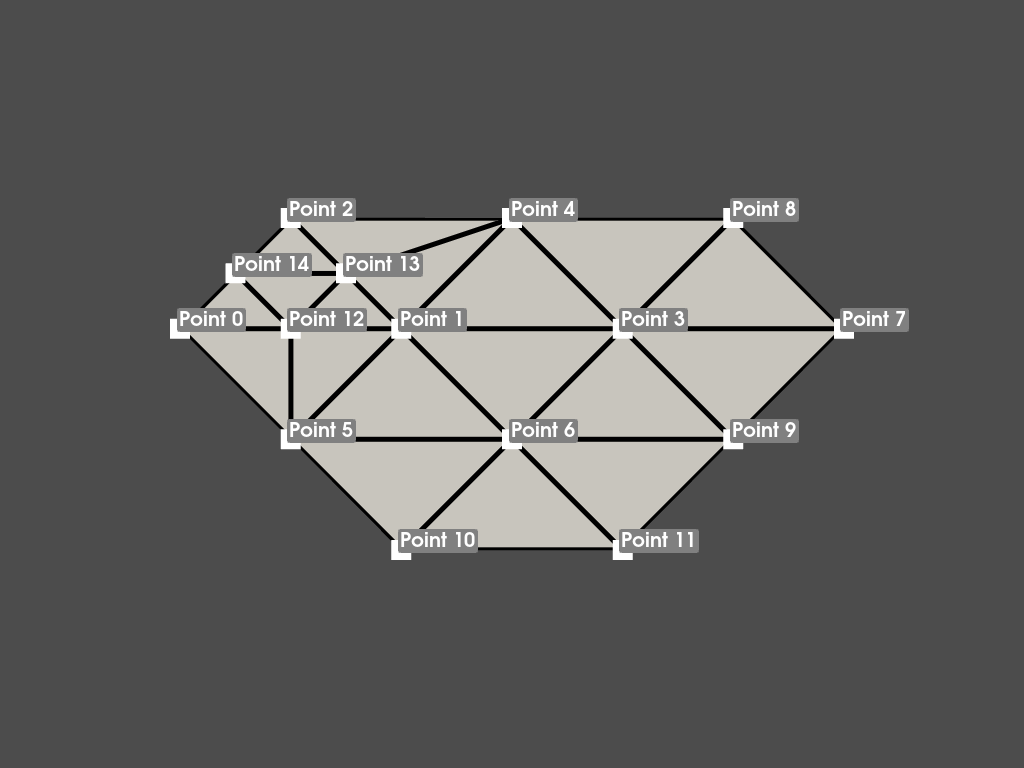

In [3]:
import numpy as np
import pyvista
import math

points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [4,0,0],
                  [3,1,0],
                  [1,-1,0],
                  [3,-1,0],
                  [6,0,0],
                  [5,1,0],
                  [5,-1,0],
                  [2,-2,0],
                  [4,-2,0]])
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]

c = [0] #number of the cell you wish to refine
clen = len(c)
r = []

for cx in range(0,clen):
    d = cells[c[cx]][1]
    e = cells[c[cx]][2]
    f = cells[c[cx]][3]
    cy=[d,e,f] #the numbers of the points creating the cell
    g = len(points) #the total number of points in the mesh
    i = len(cells) #the total number of cells in the mesh

    #------Calculating the connectivity of the points---------------------------------------------------------------------#
    connected_points = [] #the number of cells a single point is connected to
    cp1 = 0

    for y in range(0,g):
        if y == 3:
            for x in range(0,i):
                cp = cells[x].count(y) #counting the number of times a point has been listed in the cells array
                cp1= cp1+cp #adding up the counting               
            connected_points.append(cp1-i) #removing the additional countings of the triangluarity of the cells
            cp1 = 0
            
        elif y != 3:
            for x in range(0,i):
                cp = cells[x].count(y) #counting the number of times a point has been listed in the cells array
                cp1= cp1+cp #adding up the counting 
            connected_points.append(cp1)
            cp1 = 0

    #------Calculating the connectivity of the cells----------------------------------------------------------------------#
    connected_cells = [] #the number of cells a single cell is connected to

    for y in range(0, i):
        a1 = connected_points[cells[y][1]]
        a2 = connected_points[cells[y][2]]
        a3 = connected_points[cells[y][3]]
        b = [a1,a2,a3] #an array containing the connectivity of the points of a specific cell
        c1 = b.count(2)
        c2 = b.count(3)
        c3 = b.count(6)
        if c1+c2 == 2: #if the cell is connected to two other cells
            cc = 2
            connected_cells.append(cc)
        elif c3 >= 2: #if the cell is connected to three other cells
            cc = 3
            connected_cells.append(cc)
        elif c1+c2+c3 == 1: #if the cell is connected to one other cells
            cc = 1
            connected_cells.append(cc)
        
    #--------Finding the neighbouring cells-------------------------------------------------------------------------------#
    y = [] #numbers of the neighbouring cells
    v = 0

    for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
        if d in cells[x][1:] and e in cells[x][1:]:
            if x is not c[cx]:
                y.append(x)
                v=1
    if v!= 1:
        y.append(i+1) 
        
    v=0
    for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
        if e in cells[x][1:] and f in cells[x][1:]:
            if x is not c[cx]:
                y.append(x)
                v=1
    if v!= 1:
        v=0 
        y.append(i+1)     

    v=0
    for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
        if d in cells[x][1:] and f in cells[x][1:]:
            if x is not c[cx]:
                y.append(x)
                v=1   
    if v!= 1:
        v=0
        y.append(i+1)

    #--------Determining which point the cells do not share---------------------------------------------------------------#
    rx = []
    for x in range (0,3):
        if y[x] <= i:
            q = cells[y[x]][1:] #points in the neighbouring cell
            for x in range (0,3):
                q1 = q[x]
                if q1 in cy: #if two cells share a point
                    t = 1
                    rx.append(t)
                else: # if two cells do not share a point
                    t = 0
                    rx.append(t)
        else:
            rx.append(0)
            rx.append(0)
            rx.append(0)
    r.append(rx)

#-----Splitting the cell in four--------------------------------------------------------------------------------------#  
for cx in range(0,clen):
    d = cells[c[cx]][1]
    e = cells[c[cx]][2]
    f = cells[c[cx]][3]

    point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
    point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
    point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side
    points = np.vstack([points,point1,point2,point3]) #adding the points to the points array

    g = len(points) #the new total number of points

    #changing the original cell to to the refined cell
    cells[c[cx]]= [3, (g-1),(g-2),f] 
    cells = np.vstack([cells, [3, d,(g-1),(g-3)]])
    cells = np.vstack([cells, [3, (g-2),e,(g-3)]])
    cells = np.vstack([cells, [3, (g-1),(g-2),(g-3)]])

#---------Splitting the neighbouring cells---------------------------------------------------------------------------#
j = 0
h = 0
p = [] #a storange array for the following for loop
n = []
m = [] #an array containing the index numbers of the overlapping points

for cx in range(0, len(c)):
    rx = r[cx]
    for x in range(0,len(rx)+1):
        if j < 3: 
            a = rx[x]
            p.append(a)
            j = j+1
        elif j == 3:  
            for z in range(0,3):
                z1=p[z]
                if z1==1:
                    n.append(z)
                    h=h+1
                    if h == 2:
                        m.append(n[0])
                        m.append(n[1])
                        n = []
            h = 0 
            p = [] 
            n = []
        
            if x < 9:
                a = rx[x]
                p.append(a)
            j=1
            h=0

    n=3
    j=0 

    #Splitting the neigbouring cells in two
    for z in range(0,3):
        u = y[z]
        if u <= i:
            d1 = cells[y[z]][1]
            e1 = cells[y[z]][2]
            f1 = cells[y[z]][3]
            cell = [3, d1, e1, f1]
            cell[m[j]+1] = g-n   
            cells[y[z]]= cell
            j=j+1
            cell = [3, d1, e1, f1]
            cell[m[j]+1] = g-n
            cells = np.vstack([cells, cell])  
            j=j+1
        n=n-1
    
#---------Plotting the new mesh--------------------------------------------------------------------------------------#
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
label_coords = mesh.points + [0, 0, 0.01]
pl.add_point_labels(label_coords, [f'Point {i}' for i in range(15)],
                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

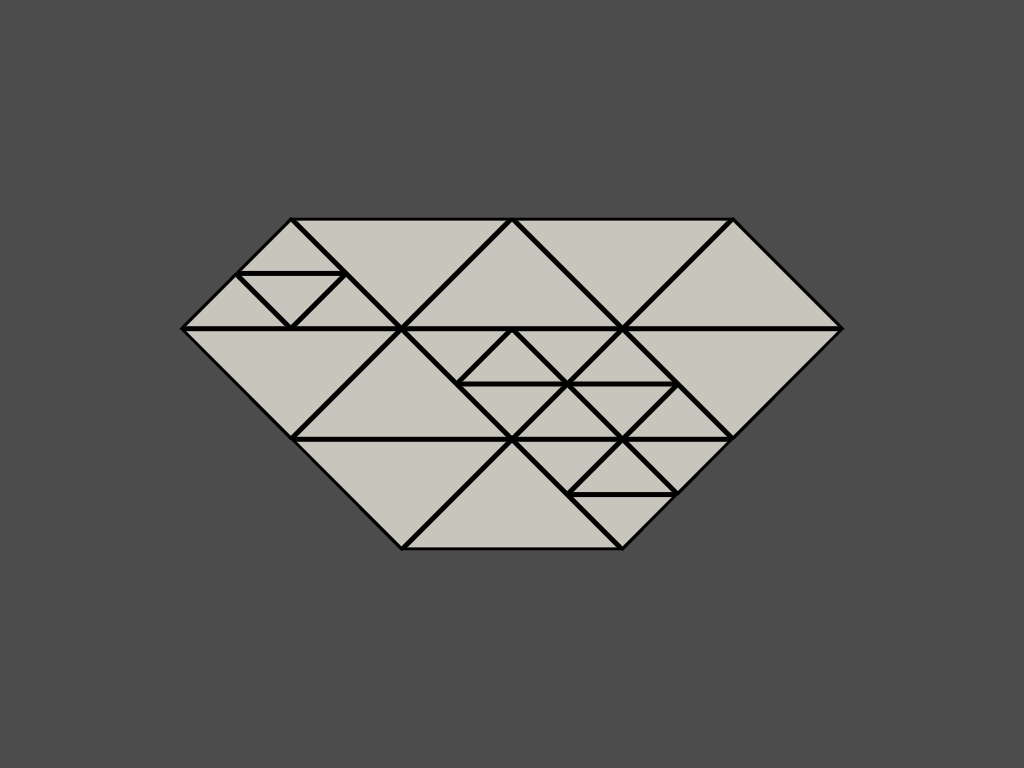

In [4]:
import numpy as np
import pyvista
import math

points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [4,0,0],
                  [3,1,0],
                  [1,-1,0],
                  [3,-1,0],
                  [6,0,0],
                  [5,1,0],
                  [5,-1,0],
                  [2,-2,0],
                  [4,-2,0]])
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]

c = [0,5,12] #number of the cell you wish to refine
clen = len(c)
r = []
ytotal = []

for cx in range(0,clen):
    d = cells[c[cx]][1]
    e = cells[c[cx]][2]
    f = cells[c[cx]][3]
    cy=[d,e,f] #the numbers of the points creating the cell
    g = len(points) #the total number of points in the mesh
    i = len(cells) #the total number of cells in the mesh

    #------Calculating the connectivity of the points---------------------------------------------------------------------#
    connected_points = [] #the number of cells a single point is connected to
    cp1 = 0

    for y in range(0,g):
        if y == 3:
            for x in range(0,i):
                cp = cells[x].count(y) #counting the number of times a point has been listed in the cells array
                cp1= cp1+cp #adding up the counting               
            connected_points.append(cp1-i) #removing the additional countings of the triangluarity of the cells
            cp1 = 0
            
        elif y != 3:
            for x in range(0,i):
                cp = cells[x].count(y) #counting the number of times a point has been listed in the cells array
                cp1= cp1+cp #adding up the counting 
            connected_points.append(cp1)
            cp1 = 0

    #------Calculating the connectivity of the cells----------------------------------------------------------------------#
    connected_cells = [] #the number of cells a single cell is connected to

    for y in range(0, i):
        a1 = connected_points[cells[y][1]]
        a2 = connected_points[cells[y][2]]
        a3 = connected_points[cells[y][3]]
        b = [a1,a2,a3] #an array containing the connectivity of the points of a specific cell
        c1 = b.count(2)
        c2 = b.count(3)
        c3 = b.count(6)
        if c1+c2 == 2: #if the cell is connected to two other cells
            cc = 2
            connected_cells.append(cc)
        elif c3 >= 2: #if the cell is connected to three other cells
            cc = 3
            connected_cells.append(cc)
        elif c1+c2+c3 == 1: #if the cell is connected to one other cells
            cc = 1
            connected_cells.append(cc)
        
    #--------Finding the neighbouring cells-------------------------------------------------------------------------------#
    y = [] #numbers of the neighbouring cells
    v = 0

    for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
        if d in cells[x][1:] and e in cells[x][1:]:
            if x is not c[cx]:
                y.append(x)
                ytotal.append(x)
                v=1
    if v!= 1:
        y.append(i+1)
        ytotal.append(i+1)
        
    v=0
    for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
        if e in cells[x][1:] and f in cells[x][1:]:
            if x is not c[cx]:
                y.append(x)
                ytotal.append(x)
                v=1
    if v!= 1:
        v=0 
        y.append(i+1)
        ytotal.append(i+1)

    v=0
    for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
        if d in cells[x][1:] and f in cells[x][1:]:
            if x is not c[cx]:
                y.append(x)
                ytotal.append(x)
                v=1   
    if v!= 1:
        v=0
        y.append(i+1)
        ytotal.append(i+1)
    #--------Determining which point the cells do not share---------------------------------------------------------------#
    rx = []
    for x in range (0,3):
        if y[x] <= i:
            q = cells[y[x]][1:] #points in the neighbouring cell
            for x in range (0,3):
                q1 = q[x]
                if q1 in cy: #if two cells share a point
                    t = 1
                    rx.append(t)
                else: # if two cells do not share a point
                    t = 0
                    rx.append(t)
        else:
            rx.append(0)
            rx.append(0)
            rx.append(0)
    r.append(rx)
    
#---------Finding matching neighbouring cells------------------------------------------------------------------------#
for x in range (0,len(ytotal)):
    if ytotal[x] in ytotal[x+1:]:
        if ytotal[x] != i+1:
            if ytotal[x] not in c:
                c.append(ytotal[x])
                v =1
        else:
            v=0
    else:
        v =0

if len(c) == clen: # if there is no match in neighbouring cells
#-----Splitting the cell in four--------------------------------------------------------------------------------------#  
    for cx in range(0,clen):
        d = cells[c[cx]][1]
        e = cells[c[cx]][2]
        f = cells[c[cx]][3]

        point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
        point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
        point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side
        points = np.vstack([points,point1,point2,point3]) #adding the points to the points array

        g = len(points) #the new total number of points

        #changing the original cell to to the refined cell
        cells[c[cx]]= [3, (g-1),(g-2),f] 
        cells = np.vstack([cells, [3, d,(g-1),(g-3)]])
        cells = np.vstack([cells, [3, (g-2),e,(g-3)]])
        cells = np.vstack([cells, [3, (g-1),(g-2),(g-3)]])

else: #if at least two cells share the same neighbouring cell. The code will be ran again.
    clen=len(c)
    r = []
    ytotal = []

    for cx in range(0,clen):
        d = cells[c[cx]][1]
        e = cells[c[cx]][2]
        f = cells[c[cx]][3]
        cy=[d,e,f] #the numbers of the points creating the cell
        g = len(points) #the total number of points in the mesh
        i = len(cells) #the total number of cells in the mesh

        #------Calculating the connectivity of the points---------------------------------------------------------------------#
        connected_points = [] #the number of cells a single point is connected to
        cp1 = 0

        for y in range(0,g):
            if y == 3:
                for x in range(0,i):
                    cp = cells[x].count(y) #counting the number of times a point has been listed in the cells array
                    cp1= cp1+cp #adding up the counting               
                connected_points.append(cp1-i) #removing the additional countings of the triangluarity of the cells
                cp1 = 0

            elif y != 3:
                for x in range(0,i):
                    cp = cells[x].count(y) #counting the number of times a point has been listed in the cells array
                    cp1= cp1+cp #adding up the counting 
                connected_points.append(cp1)
                cp1 = 0

        #------Calculating the connectivity of the cells----------------------------------------------------------------------#
        connected_cells = [] #the number of cells a single cell is connected to

        for y in range(0, i):
            a1 = connected_points[cells[y][1]]
            a2 = connected_points[cells[y][2]]
            a3 = connected_points[cells[y][3]]
            b = [a1,a2,a3] #an array containing the connectivity of the points of a specific cell
            c1 = b.count(2)
            c2 = b.count(3)
            c3 = b.count(6)
            if c1+c2 == 2: #if the cell is connected to two other cells
                cc = 2
                connected_cells.append(cc)
            elif c3 >= 2: #if the cell is connected to three other cells
                cc = 3
                connected_cells.append(cc)
            elif c1+c2+c3 == 1: #if the cell is connected to one other cells
                cc = 1
                connected_cells.append(cc)

        #--------Finding the neighbouring cells-------------------------------------------------------------------------------#
        y = [] #numbers of the neighbouring cells
        v = 0

        for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
            if d in cells[x][1:] and e in cells[x][1:]:
                if x is not c[cx]:
                    y.append(x)
                    ytotal.append(x)
                    v=1
        if v!= 1:
            y.append(i+1)
            ytotal.append(i+1)

        v=0
        for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
            if e in cells[x][1:] and f in cells[x][1:]:
                if x is not c[cx]:
                    y.append(x)
                    ytotal.append(x)
                    v=1
        if v!= 1:
            v=0 
            y.append(i+1)
            ytotal.append(i+1)

        v=0
        for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
            if d in cells[x][1:] and f in cells[x][1:]:
                if x is not c[cx]:
                    y.append(x)
                    ytotal.append(x)
                    v=1   
        if v!= 1:
            v=0
            y.append(i+1)
            ytotal.append(i+1)
            
        #--------Determining which point the cells do not share---------------------------------------------------------------#
        rx = []
        for x in range (0,3):
            if y[x] <= i:
                q = cells[y[x]][1:] #points in the neighbouring cell
                for x in range (0,3):
                    q1 = q[x]
                    if q1 in cy: #if two cells share a point
                        t = 1
                        rx.append(t)
                    else: # if two cells do not share a point
                        t = 0
                        rx.append(t)
            else:
                rx.append(0)
                rx.append(0)
                rx.append(0)
        r.append(rx)

    #---------Finding matching neighbouring cells------------------------------------------------------------------------#
    for x in range (0,len(ytotal)):
        if ytotal[x] in ytotal[x+1:]:
            if ytotal[x] != i+1:
                if ytotal[x] not in c:
                    c.append(ytotal[x])
                    v =1
            else:
                v=0
        else:
            v =0

    clen=len(c)
    r = []
    ytotal = []

    #-----Splitting the cell in four--------------------------------------------------------------------------------------#  
for cx in range(0,clen):
    d = cells[c[cx]][1]
    e = cells[c[cx]][2]
    f = cells[c[cx]][3]

    point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
    point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
    point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side
    points = np.vstack([points,point1,point2,point3]) #adding the points to the points array

    g = len(points) #the new total number of points

    #changing the original cell to to the refined cell
    cells[c[cx]]= [3, (g-1),(g-2),f] 
    cells = np.vstack([cells, [3, d,(g-1),(g-3)]])
    cells = np.vstack([cells, [3, (g-2),e,(g-3)]])
    cells = np.vstack([cells, [3, (g-1),(g-2),(g-3)]])
#---------Plotting the new mesh--------------------------------------------------------------------------------------#
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(15)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

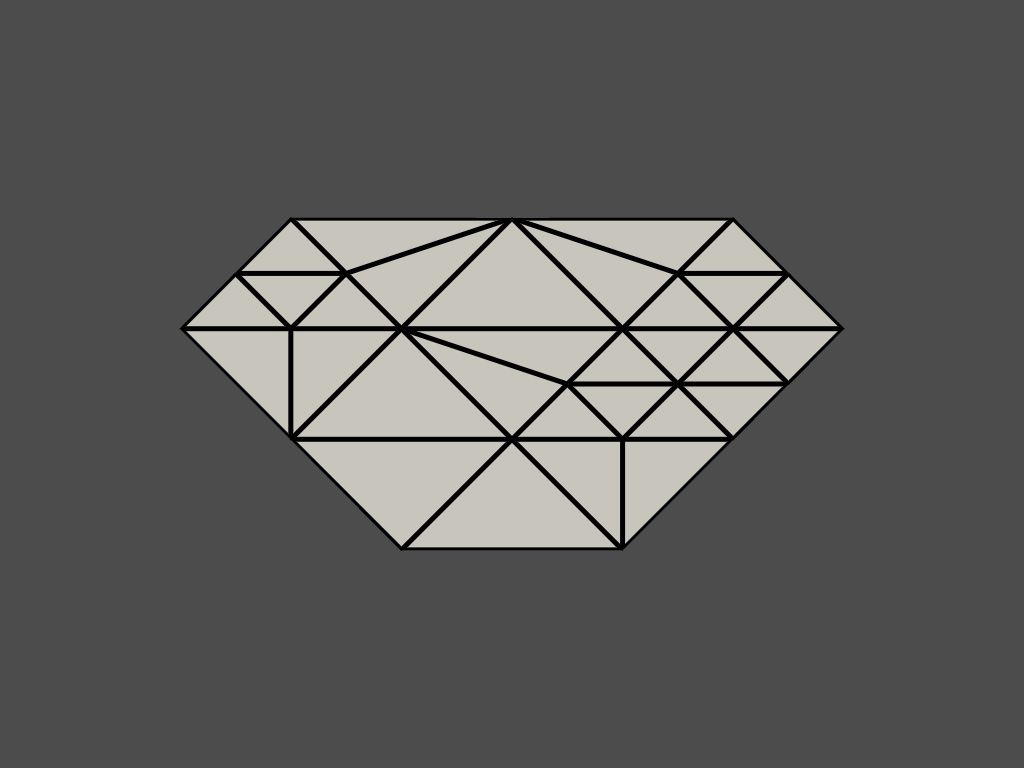

In [5]:
import numpy as np
import pyvista
import math

points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [4,0,0],
                  [3,1,0],
                  [1,-1,0],
                  [3,-1,0],
                  [6,0,0],
                  [5,1,0],
                  [5,-1,0],
                  [2,-2,0],
                  [4,-2,0]])
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]

c = [0,8,7] #number of the cell you wish to refine
clen = len(c)
r = []
ytotal = []

for cx in range(0,clen):
    d = cells[c[cx]][1]
    e = cells[c[cx]][2]
    f = cells[c[cx]][3]
    cy=[d,e,f] #the numbers of the points creating the cell
    g = len(points) #the total number of points in the mesh
    i = len(cells) #the total number of cells in the mesh

    #------Calculating the connectivity of the points---------------------------------------------------------------------#
    connected_points = [] #the number of cells a single point is connected to
    cp1 = 0

    for y in range(0,g):
        if y == 3:
            for x in range(0,i):
                cp = cells[x].count(y) #counting the number of times a point has been listed in the cells array
                cp1= cp1+cp #adding up the counting               
            connected_points.append(cp1-i) #removing the additional countings of the triangluarity of the cells
            cp1 = 0
            
        elif y != 3:
            for x in range(0,i):
                cp = cells[x].count(y) #counting the number of times a point has been listed in the cells array
                cp1= cp1+cp #adding up the counting 
            connected_points.append(cp1)
            cp1 = 0

    #------Calculating the connectivity of the cells----------------------------------------------------------------------#
    connected_cells = [] #the number of cells a single cell is connected to

    for y in range(0, i):
        a1 = connected_points[cells[y][1]]
        a2 = connected_points[cells[y][2]]
        a3 = connected_points[cells[y][3]]
        b = [a1,a2,a3] #an array containing the connectivity of the points of a specific cell
        c1 = b.count(2)
        c2 = b.count(3)
        c3 = b.count(6)
        if c1+c2 == 2: #if the cell is connected to two other cells
            cc = 2
            connected_cells.append(cc)
        elif c3 >= 2: #if the cell is connected to three other cells
            cc = 3
            connected_cells.append(cc)
        elif c1+c2+c3 == 1: #if the cell is connected to one other cells
            cc = 1
            connected_cells.append(cc)
        
    #--------Finding the neighbouring cells-------------------------------------------------------------------------------#
    y = [] #numbers of the neighbouring cells
    v = 0

    for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
        if d in cells[x][1:] and e in cells[x][1:]:
            if x is not c[cx]:
                y.append(x)
                ytotal.append(x)
                v=1
    if v!= 1:
        y.append(i+1)
        ytotal.append(i+1)
        
    v=0
    for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
        if e in cells[x][1:] and f in cells[x][1:]:
            if x is not c[cx]:
                y.append(x)
                ytotal.append(x)
                v=1
    if v!= 1:
        v=0 
        y.append(i+1)
        ytotal.append(i+1)

    v=0
    for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
        if d in cells[x][1:] and f in cells[x][1:]:
            if x is not c[cx]:
                y.append(x)
                ytotal.append(x)
                v=1   
    if v!= 1:
        v=0
        y.append(i+1)
        ytotal.append(i+1)
    
#---------Finding matching neighbouring cells------------------------------------------------------------------------#
for x in range (0,len(ytotal)):
    if ytotal[x] in ytotal[x+1:]:
        if ytotal[x] != i+1:
            if ytotal[x] not in c:
                c.append(ytotal[x])
                v =1
        else:
            v=0
    else:
        v =0

if len(c) == clen: # if there is no match in neighbouring cells
#-----Splitting the cell in four--------------------------------------------------------------------------------------#  
    a=0
    
else: #if at least two cells share the same neighbouring cell. The code will be ran again.
    clen=len(c)
    r = []
    ytotal = []

    for cx in range(0,clen):
        d = cells[c[cx]][1]
        e = cells[c[cx]][2]
        f = cells[c[cx]][3]
        cy=[d,e,f] #the numbers of the points creating the cell
        g = len(points) #the total number of points in the mesh
        i = len(cells) #the total number of cells in the mesh

        #------Calculating the connectivity of the points---------------------------------------------------------------------#
        connected_points = [] #the number of cells a single point is connected to
        cp1 = 0

        for y in range(0,g):
            if y == 3:
                for x in range(0,i):
                    cp = cells[x].count(y) #counting the number of times a point has been listed in the cells array
                    cp1= cp1+cp #adding up the counting               
                connected_points.append(cp1-i) #removing the additional countings of the triangluarity of the cells
                cp1 = 0

            elif y != 3:
                for x in range(0,i):
                    cp = cells[x].count(y) #counting the number of times a point has been listed in the cells array
                    cp1= cp1+cp #adding up the counting 
                connected_points.append(cp1)
                cp1 = 0

        #------Calculating the connectivity of the cells----------------------------------------------------------------------#
        connected_cells = [] #the number of cells a single cell is connected to

        for y in range(0, i):
            a1 = connected_points[cells[y][1]]
            a2 = connected_points[cells[y][2]]
            a3 = connected_points[cells[y][3]]
            b = [a1,a2,a3] #an array containing the connectivity of the points of a specific cell
            c1 = b.count(2)
            c2 = b.count(3)
            c3 = b.count(6)
            if c1+c2 == 2: #if the cell is connected to two other cells
                cc = 2
                connected_cells.append(cc)
            elif c3 >= 2: #if the cell is connected to three other cells
                cc = 3
                connected_cells.append(cc)
            elif c1+c2+c3 == 1: #if the cell is connected to one other cells
                cc = 1
                connected_cells.append(cc)

        #--------Finding the neighbouring cells-------------------------------------------------------------------------------#
        y = [] #numbers of the neighbouring cells
        v = 0

        for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
            if d in cells[x][1:] and e in cells[x][1:]:
                if x is not c[cx]:
                    y.append(x)
                    v=1
        if v!= 1:
            y.append(i+1)

        v=0
        for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
            if e in cells[x][1:] and f in cells[x][1:]:
                if x is not c[cx]:
                    y.append(x)
                    v=1
        if v!= 1:
            v=0 
            y.append(i+1)

        v=0
        for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
            if d in cells[x][1:] and f in cells[x][1:]:
                if x is not c[cx]:
                    y.append(x)
                    v=1   
        if v!= 1:
            v=0
            y.append(i+1)
            
        ytotal.append(y)    

    #---------Finding matching neighbouring cells------------------------------------------------------------------------#
    for x in range (0,len(ytotal)):
        if ytotal[x] in ytotal[x+1:]:
            if ytotal[x] != i+1:
                if ytotal[x] not in c:
                    c.append(ytotal[x])
                    v =1
            else:
                v=0
        else:
            v =0

    clen=len(c)
#--------Taking out the cells that are already refined----------------------------------------------------------------#
yleft = ytotal #the numbers of the cells that need to be split in two

for x in range (0,len(ytotal)):
    for z in range(0,3):
        if ytotal[x][z] in c:
            yleft[x][z] = i+1 #all cells that are already refined are replaced by the number i+1
        elif ytotal:
            v=0

#--------Determining which point the cells do not share---------------------------------------------------------------#

for cx in range(0,clen):
    rx = []
    d = cells[c[cx]][1]
    e = cells[c[cx]][2]
    f = cells[c[cx]][3]
    cy=[d,e,f] #the numbers of the points creating the cell
    y = yleft[cx]

    for x in range (0,3):
        if y[x] <= i:
            q = cells[y[x]][1:] #points in the neighbouring cell
            for x in range (0,3):
                q1 = q[x]
                if q1 in cy: #if two cells share a point
                    t = 1
                    rx.append(t)
                else: # if two cells do not share a point
                    t = 0
                    rx.append(t)
        else:
            rx.append(0)
            rx.append(0)
            rx.append(0)
    r.append(rx)

#-----Splitting the cell in four--------------------------------------------------------------------------------------#  
for cx in range(0,clen):
    d = cells[c[cx]][1]
    e = cells[c[cx]][2]
    f = cells[c[cx]][3]
    point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
    point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
    point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side
    points = np.vstack([points,point1,point2,point3]) #adding the points to the points array
    g = len(points) #the new total number of points
    #changing the original cell to to the refined cell
    cells[c[cx]]= [3, (g-1),(g-2),f] 
    cells = np.vstack([cells, [3, d,(g-1),(g-3)]])
    cells = np.vstack([cells, [3, (g-2),e,(g-3)]])
    cells = np.vstack([cells, [3, (g-1),(g-2),(g-3)]])
    
#---------Splitting the neighbouring cells---------------------------------------------------------------------------#
for cx in range(0,len(c)):
    j = 0
    h = 0
    p = [] #a storange array for the following for loop
    n = []
    m = [] #an array containing the index numbers of the overlapping points
    rx = r[cx]
    for x in range(0,len(rx)+1):
        if j < 3: 
            a = rx[x]
            p.append(a)
            j = j+1
        elif j == 3:  
            for z in range(0,3):
                z1=p[z]
                if z1==1:
                    n.append(z)
                    h=h+1
                    if h == 2:
                        m.append(n[0])
                        m.append(n[1])
                        n = []
            h = 0 
            p = [] 
            n = []

            if x < 9:
                a = rx[x]
                p.append(a)
            j=1
            h=0
    n=3
    g=len(points)-3*(len(c)-cx-1)
    j=0 
    y = yleft[cx]
        #Splitting the neigbouring cells in two
    for z in range(0,3):
        u = y[z]
        if u <= i:
            d1 = cells[y[z]][1]
            e1 = cells[y[z]][2]
            f1 = cells[y[z]][3]
            cell = [3, d1, e1, f1]
            cell[m[j]+1] = g-n   
            cells[y[z]]= cell
            j=j+1
            cell = [3, d1, e1, f1]
            cell[m[j]+1] = g-n
            cells = np.vstack([cells, cell])  
            j=j+1
        n=n-1

#---------Plotting the new mesh--------------------------------------------------------------------------------------#
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(len(points))],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()    